In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colors as colors
import Q2Q1FEM
import PolyFEM
import pandas as pd 
import itertools
from copy import deepcopy
import amplify
from amplify import BinaryPoly, gen_symbols,sum_poly, decode_solution
from amplify import Solver
from amplify.client import FixstarsClient
token = "AE/1WaScy7jya1I2su6uQKSd0z0L11wAY0D "
import time

In [2]:
nelm = 32
wid = 1/3
Node,Element,NodeBC=Q2Q1FEM.RecSquareMeshQ2(nelm,wid)
Node_P,Element_P,NodeBC_P=Q2Q1FEM.RecSquareMeshQ1(nelm,wid) #Don't use NodeBC_P!!!!(NodeBC_P contains the value of the velocity🥶)
fem_NElem = Element.shape[0]
zIni = np.ones(fem_NElem)

In [3]:
adj_elem_list = []
for i in range(fem_NElem):
    t_adj = []
    if i%nelm!=0:
        t_u = i-1
        t_adj.append(t_u)
    if i>=nelm:
        t_l = i-nelm
        t_adj.append(t_l)
    if i%nelm!=nelm-1:
        t_o = i+1
        t_adj.append(t_o)
    if (nelm*nelm)-i>nelm:
        t_r = i+nelm
        t_adj.append(t_r)
    adj_elem_list.append(t_adj)

In [19]:
def Construct_QUBO(Nelm,u,v,volfrac,num_bit_per,xc):
    ## bit string
    v_limited = volfrac*Nelm

    ## coef for porous resistivity
    coef_pr = 10**5/4
    coef_pr_pres = [0 for _ in range(Nelm)]

    ## coef for energy loss, eqn constraint, gradient energy, heviside function, boundary constraint, domain constraints
    alpha_el = 5
    alpha_eqn_c = 1
    alpha_ge = 10.0
    alpha_hev = 300.0
    alpha_bc = 1.0
    alpha_dc = 700.0

    ## qubit
    q = gen_symbols(BinaryPoly,Nelm,num_bit_per+1)

    ## objective function
    obj_func = BinaryPoly()

    ### energy loss
    for t_id in range(Nelm):
        coef_pr_e = (1-q[t_id][-1])*coef_pr
        t_uvec = u[t_id]/xc*2
        t_vvec = v[t_id]/xc*2
        obj_func += alpha_el*(coef_pr_e*(t_uvec*t_uvec+t_vvec*t_vvec) )

    ### gradient energy
    for t_id,t_q in enumerate(q):
        for tt_id in adj_elem_list[t_id]:
            phi_i = (sum_poly(t_q[:-1])/num_bit_per*2)-1
            phi_j = (sum_poly(q[tt_id][:-1])/num_bit_per*2)-1
            obj_func += alpha_ge/2*(phi_i-phi_j)**2

    ### boundary constraint
    # for t_id, t_q in enumerate(q):
    #     if t_id in in_bound_element+out_bound_element:
    #         obj_func += alpha_bc*((sum_poly(t_q[:-1])/num_bit_per*2)-1 -1)**2
    #     else:
    #         pass

    ### heviside function
    for t_id, t_q in enumerate(q):
        obj_func += alpha_hev*(sum_poly(t_q[:-1])/num_bit_per - t_q[-1])**2

    ### domaint constraints
    obj_func += alpha_dc*(sum_poly([t[-1] for t in q]) - v_limited)**2
    
    client = FixstarsClient()
    client.parameters.timeout = 200   # タイムアウト X m秒
    client.token = token # ローカル環境で使用する場合は、Amplify AEのアクセストークンを入力してください
    client.parameters.outputs.duplicate = True  # 同じエネルギー値の解を列挙するオプション（解が複数個あるため）

    solver = Solver(client)
    # solver.sort_solution = False # 解をエネルギー順にソートしない
    # solver.client.parameters.outputs.sort = False # 解をエネルギー順にソートしない
    # solver.client.parameters.outputs.num_outputs = 0 # エネルギーの更新ごとに得られたすべての解をsolutionsに含める
    # d = {"sampling_time":[],"energy":[]} #履歴データを格納する
    result = solver.solve(obj_func)
    # for t, s in zip(solver.client_result.timing.time_stamps, result.solutions):
    #     if s.is_feasible:
    #         d["sampling_time"].append(t)
    #         d["energy"].append(s.energy)
    # number=solver.client_result.execution_parameters.num_iterations
    # print("Solved",flush=True)
    #print(d)

    solution = decode_solution(q, result[0].values)
    
    return solution

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 162 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:65.1256748466269
Volume fraction: 0.53515625


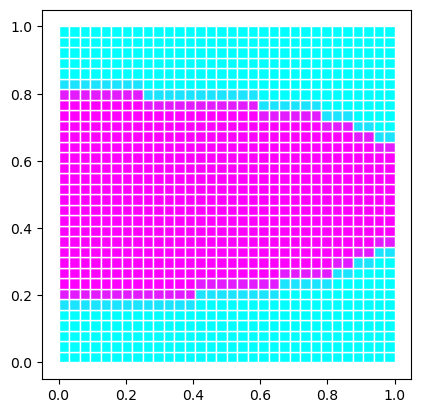

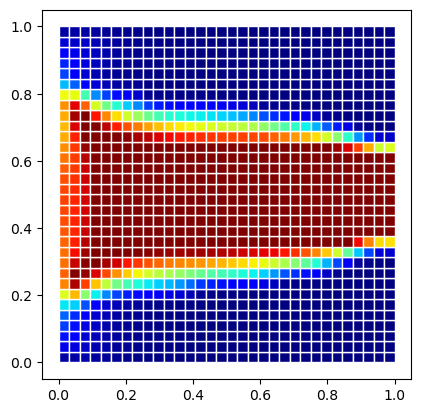

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 143 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:23.02628031434312
Volume fraction: 0.5037977430555556


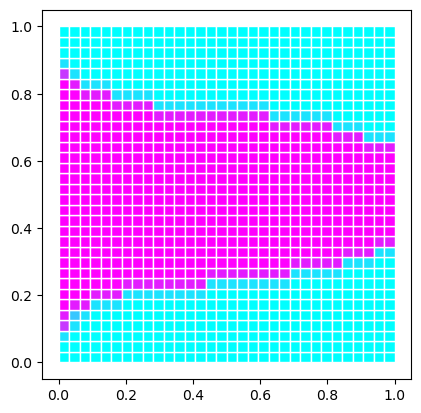

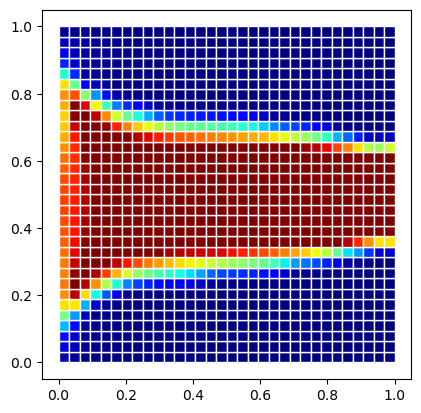

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 148 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:15.450082397878997
Volume fraction: 0.500759548611111


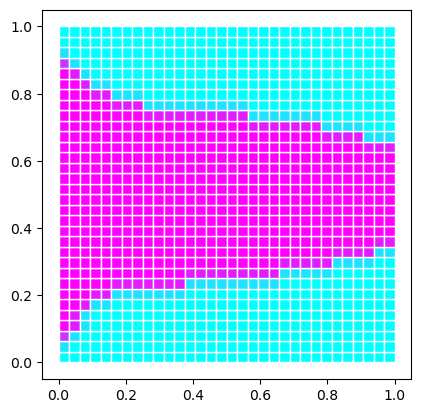

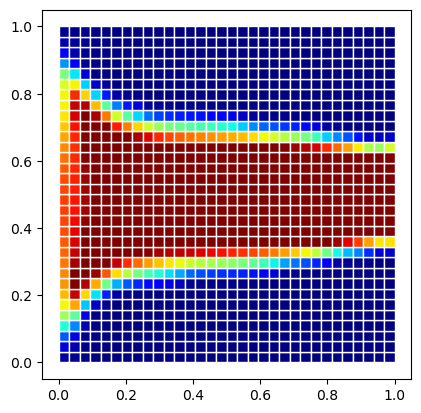

f:13.469559227904892
Volume fraction: 0.500759548611111


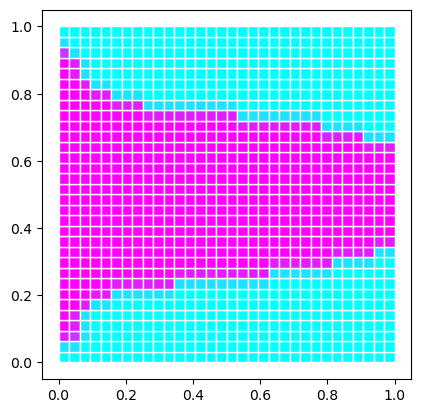

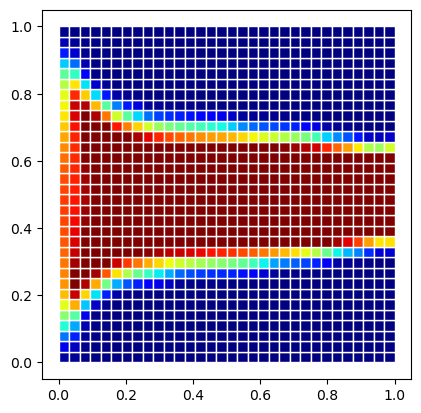

f:12.627786304234597
Volume fraction: 0.5009765625


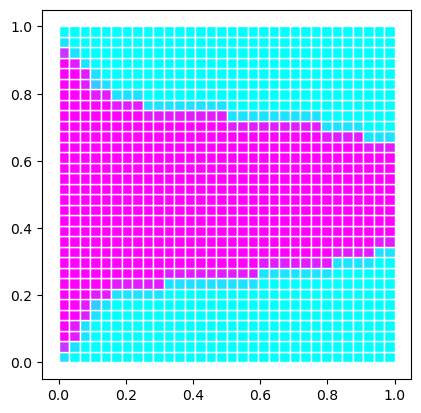

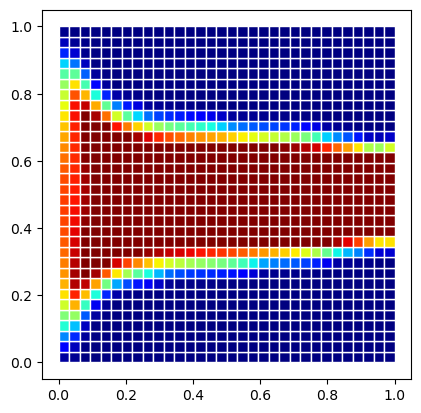

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 144 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:12.3078328074633
Volume fraction: 0.500759548611111


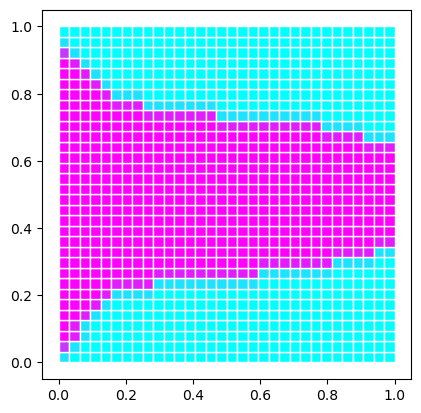

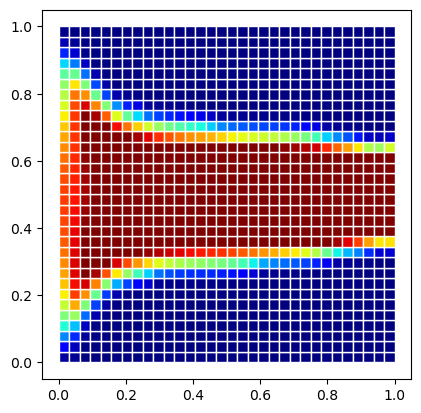

f:11.714986477187106
Volume fraction: 0.5008680555555556


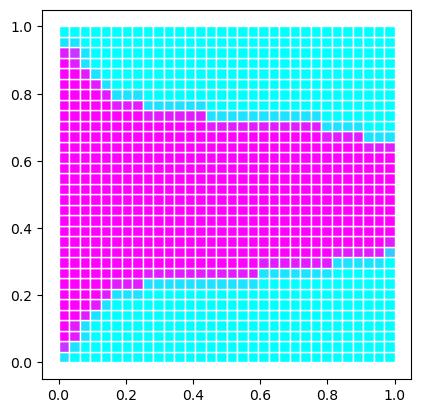

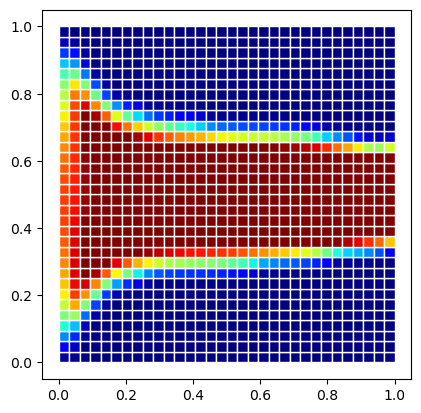

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 165 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:11.511601366219898
Volume fraction: 0.500759548611111


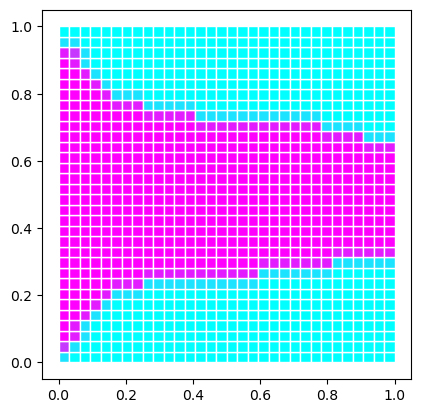

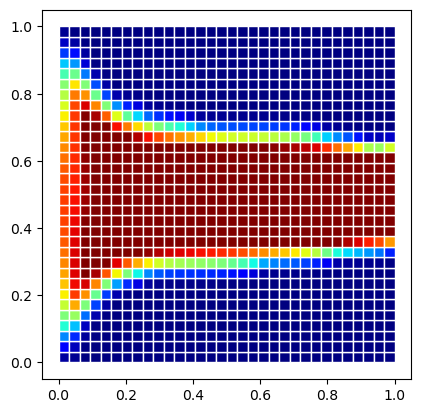

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 164 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:11.40169166647432
Volume fraction: 0.5008680555555555


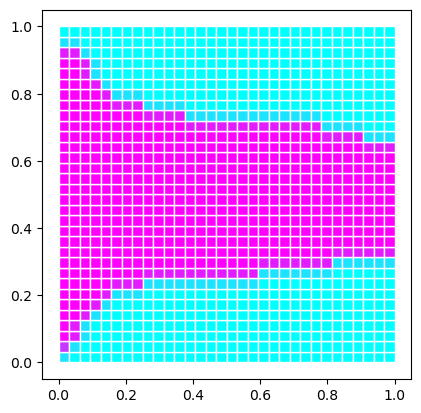

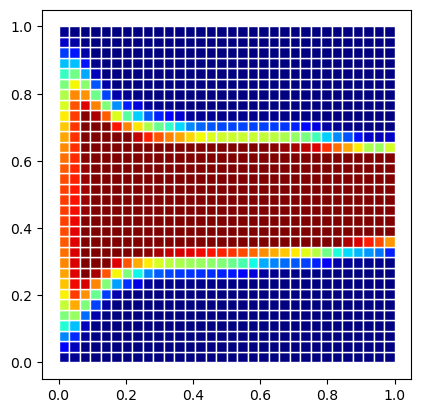

/tmp/ipykernel_285277/2029711118.py:61: RuntimeWarning: The timeout is likely to be too short for the problem size. The appropriate timeout value may be greater than 151 ms, which is the time it took to execute the minimum iteration.
  result = solver.solve(obj_func)


f:11.40169166647432
Volume fraction: 0.5008680555555555


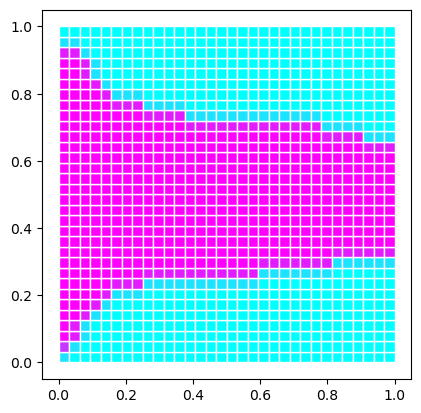

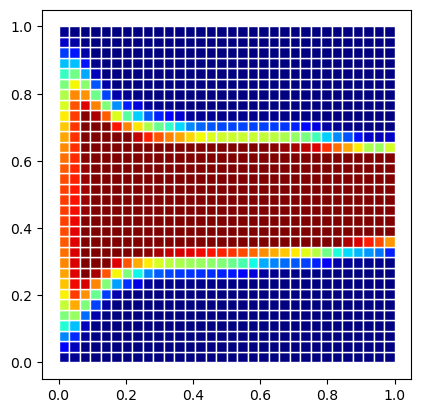

137.21321392059326


In [20]:
maxiter=15
num_bit_per = 9

start = time.time()
p,f,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,zIni)
#Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)),cmap='jet')
#print(max(np.sqrt(u**2+v**2)),min(np.sqrt(u**2+v**2)))
#p,f,u,v = PolyFEM.PolyFEM(nelm,zIni)
z_QA_new = zIni
obj = []
frac = []
for i in range(maxiter):
    #print('--- {}th iteration ---'.format(i+1))
    z_QA = z_QA_new
    # if i==0:
    #     xc = 2
    # else:
    #     xc = max(np.sqrt(u**2+v**2))
    xc=2
    solution = Construct_QUBO(fem_NElem,u,v,volfrac=0.5,num_bit_per=num_bit_per,xc=xc)
    sol = []
    # heviside=[]
    # check=[]
    for t in solution:
        pred_t_d = np.sum(t[:-1])/num_bit_per
        sol.append(pred_t_d)
        # pred_t_h = t[-1]
        # heviside.append(pred_t_h)
        # if pred_t_d >= 0.5:
        #     check.append(1)
        # else:
        #     check.append(0)
    #print('check',(np.array(check)-np.array(heviside)).sum())    
    z_QA_new = np.array(sol)
    p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z_QA_new) #original
    #p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,(0.2+(z_QA_new)*3/5)) #phi is 0.2~0.8
    #p,f_new,u,v = PolyFEM.PolyFEM(nelm,z_QA_new)
    #print(max(u**2+v**2),min(u**2+v**2),np.mean(u**2+v**2))
    #p_poly,f_new_poly,u_poly,v_poly = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z_QA_new)
    print('f:{}'.format(f_new*1000))
    print('Volume fraction: {}'.format(sum(sol)/fem_NElem))
    Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z_QA_new,1,0,cmap='cool')
    obj.append(f_new*1000)
    frac.append(sum(sol)/fem_NElem)
    #Q2Q1FEM.Plot_quiver(Node_P,Element_P,u,v)
    Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),1.2,0,cmap='jet')
    # Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,p,max(p),min(p),cmap='jet')
    # print('pressure:',max(p),min(p))
    #print(np.max(np.abs(z_QA-z_QA_new)))
    if np.max(np.abs(z_QA-z_QA_new))<0.01:
        break
end = time.time()
print(end-start)

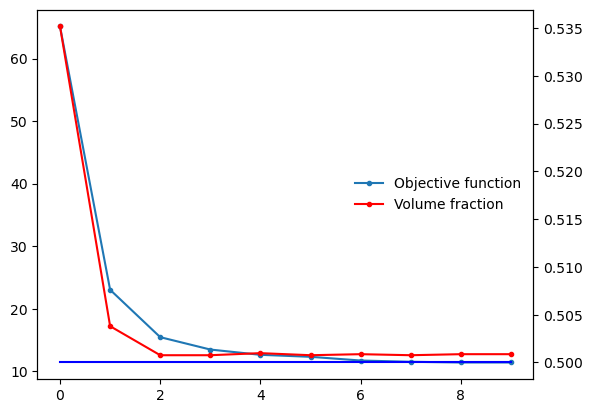

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(obj,label="Objective function",marker='.')
ax2.plot(frac,label='Volume fraction',marker='.',color='r')
ax2.plot([0,i],[0.5,0.5],color='b')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2, loc='center right',frameon=False)

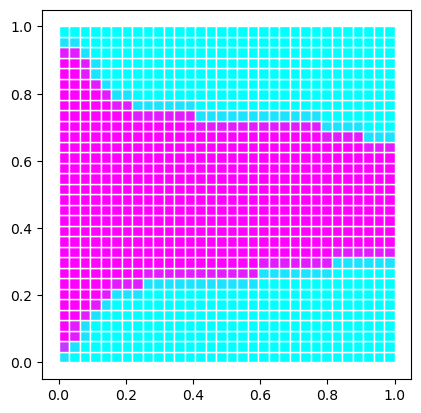

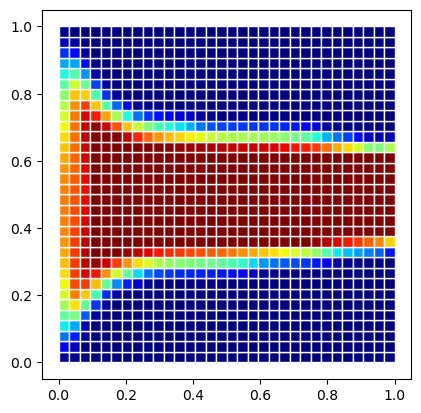

28.716041455842646
9
120.10364031791687
0.5008680555555556


In [11]:
p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z_QA_new) #original
p_poly,f_new_poly,u_poly,v_poly = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z_QA_new)
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z_QA_new,1,0,cmap='cool')
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),1.3,0,cmap='jet')
print(f_new_poly)
print(i)
print(end-start)
print(z_QA_new.sum()/fem_NElem)

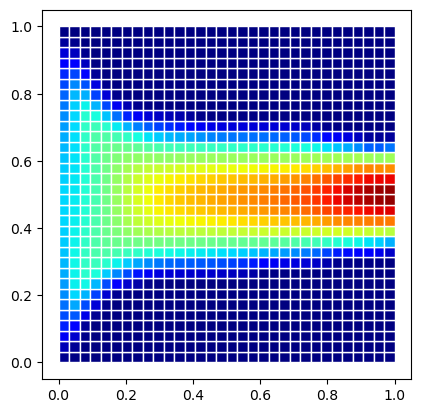

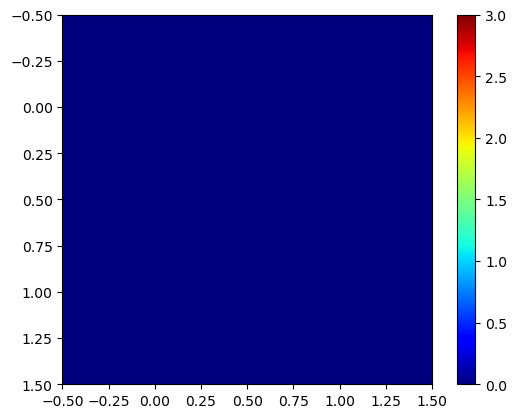

In [15]:
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),3,0,cmap='jet')
plt.imshow(np.zeros(4).reshape(2,2),vmin=0,vmax=3,cmap='jet')
plt.colorbar()